In [11]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer



# Load the dataset
df = pd.read_csv('processed_accidenta.csv')
df=df.replace({"Day":0,"Night":1})

# Prepare the data
X = df.drop('Severity', axis=1)  # Features
y = df['Severity']  # Target variable

# Handle categorical features (one-hot encoding)
X = pd.get_dummies(X, columns=['Weather_Condition', 'Wind_Direction'], drop_first=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X.iloc[1:,2:9])
X.iloc[1:, 2:9] = imputer.transform(X.iloc[1:, 2:9])


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Ensure X_test has the same columns as X_train (fill missing columns with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Additional metrics (e.g., precision, recall, etc.)
print(classification_report(y_test, y_pred))



Accuracy: 78.00%
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       0.86      0.61      0.72        31
           3       0.68      0.71      0.70        21
           4       0.68      0.85      0.75        27

    accuracy                           0.78       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.78      0.78       100



In [225]:
print(X_train,y_train)

      Unnamed: 0  Start_Lat   Start_Lng  Distance(mi)  Temperature(F)  \
7407        7407  41.062710  -73.862244         0.000            82.9   
5892        5892  34.038456 -118.274010         0.000            50.0   
5301        5301  44.999046  -93.089401         0.000             3.9   
4808        4808  34.543423 -120.195586         0.000            56.0   
8148        8148  30.193420  -81.730080         0.587            84.9   
...          ...        ...         ...           ...             ...   
9225        9225  33.846840 -118.317173         0.001            63.0   
4859        4859  40.902904  -73.814853         0.219            79.0   
3264        3264  39.481859 -119.787249         3.438            30.0   
9845        9845  32.778130 -111.515470         2.038            61.0   
2732        2732  28.607473  -81.393044         0.000            80.1   

      Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
7407           66.0         47.0         30.03           

In [17]:
import pickle

# Save the model
with open('traffic_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [13]:
import random
import pandas as pd

# Function to generate random input (same as before)
def generate_random_input():
    random_input = {
        'Temperature(F)': random.uniform(-30, 110),
        'Wind_Chill(F)': random.uniform(-50, 100),
        'Distance(mi)':random.uniform(0,100),
        'Humidity(%)': random.randint(0, 100),
        'Pressure(in)': random.uniform(28, 31),
        'Visibility(mi)': random.uniform(1, 20),
        'Wind_Speed(mph)': random.uniform(0, 60),
        'Precipitation(in)': random.uniform(0, 1),
        'Amenity': random.choice([0, 1]),
        'Bump': random.choice([0, 1]),
        'Crossing': random.choice([0, 1]),
        'Junction': random.choice([0, 1]),
        'Station': random.choice([0, 1]),
        'Stop': random.choice([0, 1]),
        'Traffic_Signal': random.choice([0, 1]),
        'Sunrise_Sunset': random.choice([0, 1]),
        'Wind_Direction_CALM': random.choice([0, 1]),
        'Wind_Direction_Calm': random.choice([0, 1]),
        'Wind_Direction_E': random.choice([0, 1]),
        'Wind_Direction_ENE': random.choice([0, 1]),
        'Wind_Direction_ESE': random.choice([0, 1]),
        'Wind_Direction_East': random.choice([0, 1]),
        'Wind_Direction_N': random.choice([0, 1]),
        'Wind_Direction_NE': random.choice([0, 1]),
        'Wind_Direction_NNE': random.choice([0, 1]),
        'Wind_Direction_NNW': random.choice([0, 1]),
        'Wind_Direction_NW': random.choice([0, 1]),
        'Wind_Direction_North': random.choice([0, 1]),
        'Wind_Direction_S': random.choice([0, 1]),
        'Wind_Direction_SE': random.choice([0, 1]),
        'Wind_Direction_SSE': random.choice([0, 1]),
        'Wind_Direction_SSW': random.choice([0, 1]),
        'Wind_Direction_SW': random.choice([0, 1]),
        'Wind_Direction_South': random.choice([0, 1]),
        'Wind_Direction_VAR': random.choice([0, 1]),
        'Wind_Direction_Variable': random.choice([0, 1]),
        'Wind_Direction_W': random.choice([0, 1]),
        'Wind_Direction_WNW': random.choice([0, 1]),
        'Wind_Direction_WSW': random.choice([0, 1]),
        'Wind_Direction_West': random.choice([0, 1]),
        'Weather_Condition_Clear': random.choice([0, 1]),
        'Weather_Condition_Cloudy': random.choice([0, 1]),
        'Weather_Condition_Fog': random.choice([0, 1]),
        'Weather_Condition_Freezing Conditions': random.choice([0, 1]),
        'Weather_Condition_Rain': random.choice([0, 1]),
        'Weather_Condition_Snow': random.choice([0, 1]),
        'Weather_Condition_Thunderstorm': random.choice([0, 1]),
        'Weather_Condition_Unknown': random.choice([0, 1])
    }

    if random.random() < 0.33:  # 33% chance for "Light"
        random_input['Temperature(F)'] = random.uniform(70, 100)
        random_input['Precipitation(in)'] = random.uniform(0, 0.1)
        random_input['Wind_Speed(mph)'] = random.uniform(0, 20)
    elif random.random() < 0.33:  # 33% chance for "Moderate"
        random_input['Temperature(F)'] = random.uniform(50, 80)
        random_input['Precipitation(in)'] = random.uniform(0.1, 0.3)
        random_input['Wind_Speed(mph)'] = random.uniform(20, 40)
    else:  # 33% chance for "Severe"
        random_input['Temperature(F)'] = random.uniform(30, 50)
        random_input['Precipitation(in)'] = random.uniform(0.5, 1)
        random_input['Wind_Speed(mph)'] = random.uniform(40, 60)

    return random_input

# Function to preprocess input data
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    return input_df

# Function to predict severity
def predict_severity(input_data):
    preprocessed_data = preprocess_input(input_data)
    prediction = rf_model.predict(preprocessed_data)
    severity_map = {1: 'Light', 2: 'Moderate', 3: 'Severe',4: 'Severe'}
    severity = severity_map.get(prediction[0], 'Unknown')
    return severity

# Generate a random input and predict the severity
for i in range(5):  # Predict 5 times with different random inputs
    random_input = generate_random_input()  # Generate a random input
    predicted_severity = predict_severity(random_input)  # Predict the severity
    print(f"Random Input {i+1}: {random_input}")
    print(f"Predicted Severity: {predicted_severity}\n")

Random Input 1: {'Temperature(F)': 39.64217916282335, 'Wind_Chill(F)': 16.69763007698097, 'Distance(mi)': 13.861453770560727, 'Humidity(%)': 71, 'Pressure(in)': 29.9900274023722, 'Visibility(mi)': 5.219927748471966, 'Wind_Speed(mph)': 42.01763200162629, 'Precipitation(in)': 0.9584384030645037, 'Amenity': 0, 'Bump': 1, 'Crossing': 0, 'Junction': 1, 'Station': 1, 'Stop': 1, 'Traffic_Signal': 0, 'Sunrise_Sunset': 1, 'Wind_Direction_CALM': 1, 'Wind_Direction_Calm': 1, 'Wind_Direction_E': 0, 'Wind_Direction_ENE': 0, 'Wind_Direction_ESE': 0, 'Wind_Direction_East': 1, 'Wind_Direction_N': 0, 'Wind_Direction_NE': 1, 'Wind_Direction_NNE': 1, 'Wind_Direction_NNW': 0, 'Wind_Direction_NW': 0, 'Wind_Direction_North': 1, 'Wind_Direction_S': 1, 'Wind_Direction_SE': 0, 'Wind_Direction_SSE': 1, 'Wind_Direction_SSW': 1, 'Wind_Direction_SW': 0, 'Wind_Direction_South': 1, 'Wind_Direction_VAR': 1, 'Wind_Direction_Variable': 1, 'Wind_Direction_W': 0, 'Wind_Direction_WNW': 1, 'Wind_Direction_WSW': 1, 'Wind_Di

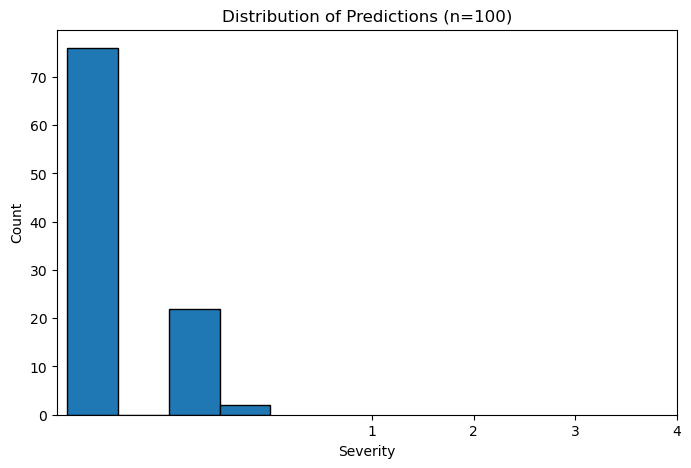

In [15]:
import matplotlib.pyplot as plt

# Function to predict multiple times and collect results
def predict_multiple_times(num_predictions=100):
    predictions = []

    for _ in range(num_predictions):
        random_input = generate_random_input()
        predicted_severity = predict_severity(random_input)
        predictions.append(predicted_severity)

    # Plot the distribution of predictions
    plt.figure(figsize=(8, 5))
    plt.hist(predictions, bins=4, edgecolor='black', align='mid')
    plt.title(f'Distribution of Predictions (n={num_predictions})')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(['1', '2', '3','4'])
    plt.show()

# Run and visualize the prediction distribution for 100 iterations
predict_multiple_times(100)


In [275]:

from joblib import dump

In [21]:
dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [299]:
X_train.columns

Index(['Unnamed: 0', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Weather_Condition_Cloudy', 'Weather_Condition_Fog',
       'Weather_Condition_Freezing Conditions', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm',
       'Wind_Direction_Calm', 'Wind_Direction_E', 'Wind_Direction_ENE',
       'Wind_Direction_ESE', 'Wind_Direction_East', 'Wind_Direction_N',
       'Wind_Direction_NE', 'Wind_Direction_NNE', 'Wind_Direction_NNW',
       'Wind_Direction_NW', 'Wind_Direction_North', 'Wind_Direction_S',
       'Wind_Direction_SE', 'Wind_Direction_SSE', 'Wind_Direction_SSW',
       'Wind_Direction_SW', 'Wind_Direction_South', 'Wind_Direction_VAR',
       'Wind_Direction_Variable', 'Wind_Direction_W', 'Wind_Direction_WNW',